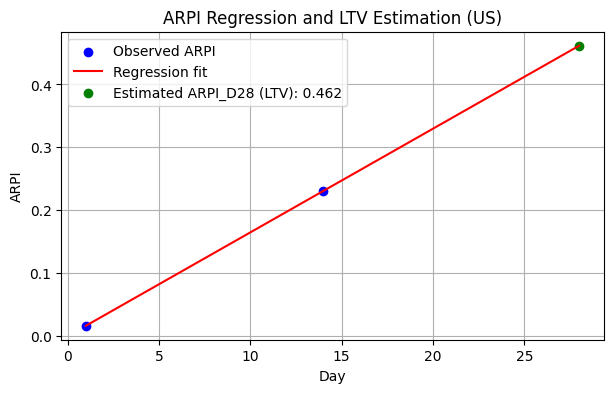

Mean ARPI_D1: 0.016
Mean ARPI_D14: 0.230
Estimated LTV (ARPI_D28): 0.462


In [1]:
# Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Load and filter data ---
df = pd.read_csv('summary.csv')
us = df[
    (df['client'] == 'fruit_battle') &
    (df['country'] == 'US') &
    (df['year'] == 2021) &
    (df['month'] == 12) &
    (df['day'].between(1, 15))
]

# --- Prepare ARPI points for regression ---
# Use mean ARPI_D1 and ARPI_D14 across all cohort days
arpi_d1 = us['arpi_d1'].mean()
arpi_d14 = us['arpi_d14'].mean()
days = np.array([[1], [14]])
arpis = np.array([arpi_d1, arpi_d14])

# --- Fit linear regression ---
reg = LinearRegression().fit(days, arpis)
arpi_d28 = reg.predict([[28]])[0]

# --- Visualize ---
plt.figure(figsize=(7,4))
plt.scatter([1, 14], [arpi_d1, arpi_d14], color='blue', label='Observed ARPI')
plt.plot([1, 14, 28], reg.predict(np.array([[1],[14],[28]])), color='red', label='Regression fit')
plt.scatter([28], [arpi_d28], color='green', label=f'Estimated ARPI_D28 (LTV): {arpi_d28:.3f}')
plt.title('ARPI Regression and LTV Estimation (US)')
plt.xlabel('Day')
plt.ylabel('ARPI')
plt.legend()
plt.grid(True)
plt.show()

# --- Output results ---
print(f"Mean ARPI_D1: {arpi_d1:.3f}")
print(f"Mean ARPI_D14: {arpi_d14:.3f}")
print(f"Estimated LTV (ARPI_D28): {arpi_d28:.3f}")